<a href="https://colab.research.google.com/github/Pedfortunato/ADVANCED-ML/blob/main/ML(AUTOML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AutoML (Aprendizado de Máquina Automatizado) refere-se a um conjunto de técnicas e ferramentas que automatizam o processo de desenvolvimento de modelos de aprendizado de máquina. O objetivo do AutoML é tornar o aprendizado de máquina mais acessível e eficiente, permitindo que pessoas com menos experiência técnica possam criar, treinar e implementar modelos de machine learning.**

In [3]:
!pip install -U nome_pacote
!pip install -q watermark
!pip install pydotplus
!pip install sklearn


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [4]:
# Imports
import pydotplus
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.tree as tree
from six import StringIO
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from IPython.display import Image
%matplotlib inline

**CARGA E EXPLORAÇÃO DOS DADOS QUE IREMOS UTILIZAR**

In [5]:
# Carrega os dados
dataset = fetch_california_housing()

# Elementos dos dados
dataset.keys()

# Converte em dataframe
dados = pd.DataFrame(dataset.data, columns = dataset.feature_names)

# Extrai a variável target
target = pd.Series(dataset.target, name = 'MedPrice')

# Shape
dados.shape

# Tipos de dados
dados.dtypes


,0
MedInc,float64
HouseAge,float64
AveRooms,float64
AveBedrms,float64
Population,float64
AveOccup,float64
Latitude,float64
Longitude,float64


**RESUMO ESTATISTICO**

In [6]:
pd.options.display.float_format = '{:,.2f}'.format
dados.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,"20,640.00","20,640.00","20,640.00","20,640.00","20,640.00","20,640.00","20,640.00","20,640.00"
mean,3.87,28.64,5.43,1.10,"1,425.48",3.07,35.63,-119.57
std,1.90,12.59,2.47,0.47,"1,132.46",10.39,2.14,2.00
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80
50%,3.53,29.00,5.23,1.05,"1,166.00",2.82,34.26,-118.49
75%,4.74,37.00,6.05,1.10,"1,725.00",3.28,37.71,-118.01
max,15.00,52.00,141.91,34.07,"35,682.00","1,243.33",41.95,-114.31


In [7]:
dados.isnull().any()

,0
MedInc,False
HouseAge,False
AveRooms,False
AveBedrms,False
Population,False
AveOccup,False
Latitude,False
Longitude,False


**DIVISÃO TREINOS TESTE**

In [8]:
X_treino, X_teste, y_treino, y_teste = train_test_split(dados, target, test_size = 0.2, random_state = 42)

In [9]:
print("Shape Atributos em Treino: {}".format(X_treino.shape))
print("Shape Target em Treino: {}".format(y_treino.shape))
print("Shape Atributos em Teste: {}".format(X_teste.shape))
print("Shape Target em Teste: {}".format(y_teste.shape))

Shape Atributos em Treino: (16512, 8)
Shape Target em Treino: (16512,)
Shape Atributos em Teste: (4128, 8)
Shape Target em Teste: (4128,)


**ENGENHARIA DE ATRIBUTOS**

<Axes: >

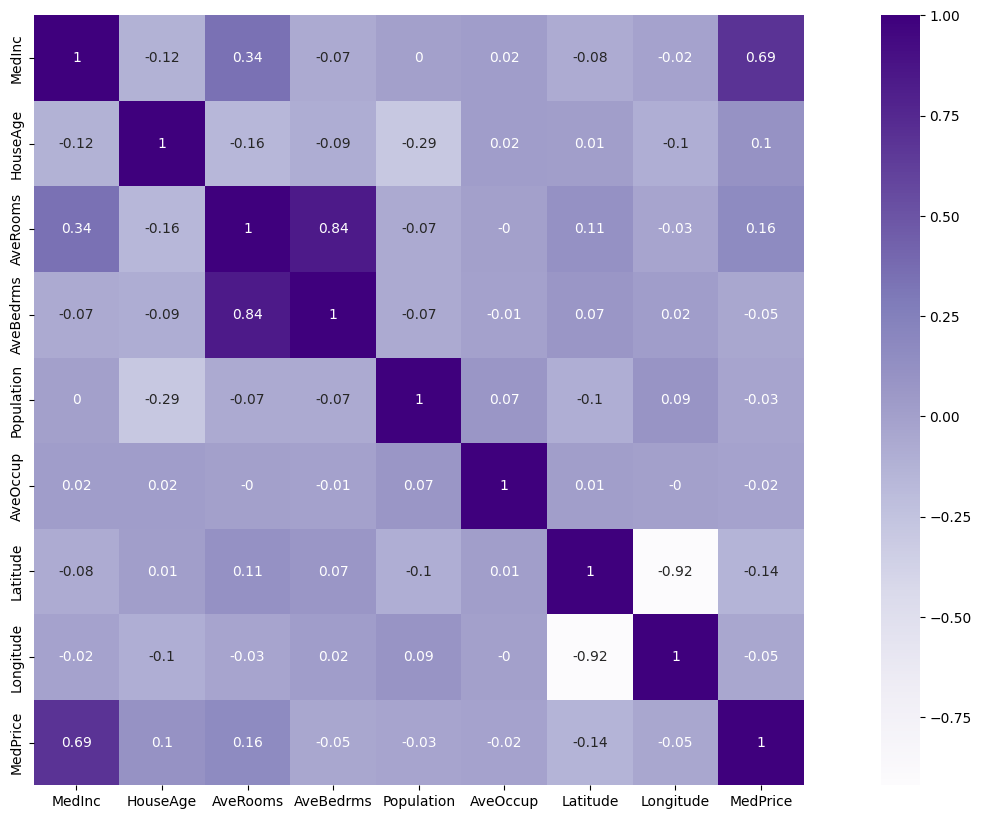

In [10]:
dados_treino = X_treino.copy()
dados_treino['MedPrice'] = y_treino
correlation_matrix = dados_treino.corr().round(2)
plt.figure(figsize = (20,10))
sns.heatmap(data = correlation_matrix, square = True, annot = True, cmap = 'Purples')


In [11]:
# Seleciona recursos de alta correlação
selected_feature_set = ['MedInc', 'AveRooms']
sub_dados_treino = dados_treino[ selected_feature_set + ['MedPrice']]

# Extrai os novos recursos de treinamento
X_treino = sub_dados_treino.drop(['MedPrice'], axis = 1)

# Seleciona os mesmos conjuntos de recursos para dados de teste
X_teste = X_teste[selected_feature_set]

**REGRESSÃO LINEAR**

In [12]:
# Cria o modelo
linear_regressor = LinearRegression()

# Treina o modelo
linear_regressor.fit(X_treino, y_treino)

# Extrai os coeficientes
coeffcients = pd.DataFrame(linear_regressor.coef_, X_treino.columns, columns = ['Coefficient'])

# Imprime o intercepto
print("Intercepto (coeficiente aprendido): {:.2f}".format(linear_regressor.intercept_))

print("\nCoeficientes das Variáveis:\n")
print(coeffcients)

Intercepto (coeficiente aprendido): 0.60

Coeficientes das Variáveis:

          Coefficient
MedInc           0.44
AveRooms        -0.04


**AVALIANDO O MODELO**

In [13]:
# Previsões em treino e teste
y_pred_treino = linear_regressor.predict(X_treino)
y_pred_teste = linear_regressor.predict(X_teste)

In [14]:
print('MSE em Treino: {}'.format(mean_squared_error(y_treino, y_pred_treino)))
print('MSE em Teste: {:.2f}'.format(mean_squared_error(y_teste, y_pred_teste)))

MSE em Treino: 0.690985965844761
MSE em Teste: 0.70


In [15]:
!pip install seaborn

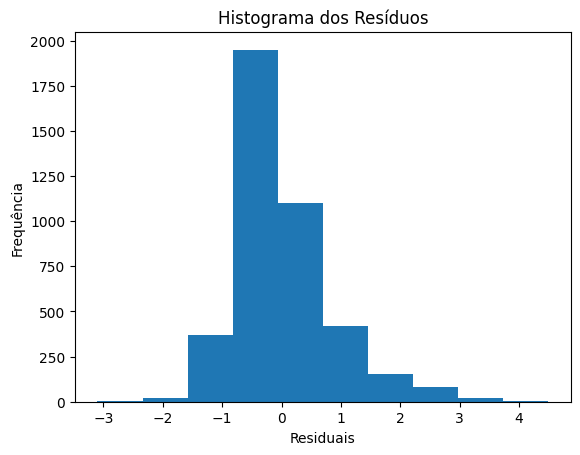

In [16]:
plt.hist(y_teste - y_pred_teste)
plt.title("Histograma dos Resíduos")
plt.xlabel("Residuais")
plt.ylabel("Frequência")
plt.show()